[View in Colaboratory](https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/log/['A3F3P1',%20'A3F3P2']-['A3F3P5']_Xception_Test.ipynb)

In [0]:
# Import library
import os
import glob
import numpy as np

In [7]:
# Mount google drive

from google.colab import drive

drive.mount('/content/gdrive')
os.listdir('gdrive/My Drive/Colab')

Mounted at /content/gdrive


['Data_', 'Model', 'Data']

In [25]:
from keras.models import load_model

# Set model path

modelPath = 'gdrive/My Drive/Colab/Model'

dataPath = 'gdrive/My Drive/Colab/Data'

modelList = glob.glob(modelPath + '/*h5')
    
numberModel = np.inf
    
while numberModel >= len(modelList): 

    for i in range(len(modelList)):
        print('#{:d}: {}'.format(i, modelList[i]))
    
    numberModel = int(input('Type In Your Model Number:\n'))

    if numberModel < len(modelList):
        print('Loading {}'.format(modelList[numberModel]))    
        model = load_model(modelList[numberModel])
        print('Loading Completed')    
    else:
        print('Invalid Model Number\n')
        


#0: gdrive/My Drive/Colab/Model/['A3F3P1', 'A3F3P2']-['A3F3P5']_Xception_10-15-12-32-36.h5
#1: gdrive/My Drive/Colab/Model/['A3F3P1', 'A3F3P2']-['A3F3P5']_ResNet50_10-15-15-17-07.h5
#2: gdrive/My Drive/Colab/Model/Normal-Fault_Xception_10-15-06:35:24.h5
#3: gdrive/My Drive/Colab/Model/Normal-Fault_Xception_10-15-06:28:30.h5
#4: gdrive/My Drive/Colab/Model/Normal-Fault_ResNet50_10-15-06:15:20.h5
#5: gdrive/My Drive/Colab/Model/['A3F1P3', 'A3F2P3']-['A3F5P3']_ResNet50_10-15-04:03:27.h5
#6: gdrive/My Drive/Colab/Model/['A1F3P3', 'A2F3P3']-['A5F3P3']_Xception_10-15-03:26:24.h5
#7: gdrive/My Drive/Colab/Model/['A1F3P3', 'A2F3P3']-['A5F3P3']_ResNet50_10-15-03:09:51.h5
#8: gdrive/My Drive/Colab/Model/A3F1P3-A3F5P3_ResNet50_10-14-14:46:44.h5
#9: gdrive/My Drive/Colab/Model/A1F3P3-A5F3P3_ResNet50_10-14-20-58-37.h5
#10: gdrive/My Drive/Colab/Model/A1F3P3-A5F3P3_Xception_10-08-19-46-29.h5
#11: gdrive/My Drive/Colab/Model/A3F3P1-A3F3P5_VGG19_10-08-11:28:34.h5
#12: gdrive/My Drive/Colab/Model/A3F3P

In [8]:
creationDate = modelList[numberModel].split('_')[-1].replace('.h5', '')

modelParamList = glob.glob(modelPath + '/*.npy')
modelParam = [param for param in modelParamList if creationDate in param]

print('Parameter npy File List: {}'.format(modelParam))

trainMean = float(np.load([param for param in modelParam if 'mean' in param][0]))
trainStd = float(np.load([param for param in modelParam if 'std' in param][0]))

Parameter npy File List: ['gdrive/My Drive/Colab/Model/std_10-15-12-32-36.npy', 'gdrive/My Drive/Colab/Model/mean_10-15-12-32-36.npy']


In [9]:
dataPath = 'gdrive/My Drive/Colab/Data'

# foldersTest = ['A3F1P3', 'A3F2P3', 'A3F3P3', 'A3F4P3', 'A3F5P3']
foldersTest = ['A3F3P1', 'A3F3P2', 'A3F3P3', 'A3F3P4', 'A3F3P5']
# foldersTest = ['A3F3P1', 'A3F3P2', 'A3F3P3', 'A3F3P4', 'A3F3P5']

pathTests = [dataPath + '/' + folder for folder in foldersTest]
print(pathTests)

# filesTestTotal = list()

# for i in range(len(foldersTest)):
#     filesTestTotal = filesTestTotal + (glob.glob(pathTests[i] + '/*.wav'))
    
# print(len(filesTestTotal))

['gdrive/My Drive/Colab/Data/A3F3P1', 'gdrive/My Drive/Colab/Data/A3F3P2', 'gdrive/My Drive/Colab/Data/A3F3P3', 'gdrive/My Drive/Colab/Data/A3F3P4', 'gdrive/My Drive/Colab/Data/A3F3P5']


In [10]:
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf

nsc = 1470
nov = nsc/2
nff = nsc

imgSize = 224

startNum = 0

for i in range(startNum, len(pathTests)):

    npyTestPath = glob.glob(pathTests[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    
    label = data[:, 1:5]
    
    if i == startNum:
        labelList = label
    else:
        labelList = np.vstack([labelList, label])

    print('Test Image Shape From {}: {}'.format(foldersTest[i], data.shape))    

    chunkLength = 500

    for j in range(int(len(imgs) / chunkLength)):

        imgsTestChunk = imgs[j * chunkLength:(j + 1) * chunkLength, :, :]

        testImgsNorm = (imgsTestChunk - trainMean) / trainStd

        testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

        X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

        Y_pred_chunk = model.predict(X_test, verbose=1)

        if j == 0:
            Y_pred_ = Y_pred_chunk
        else:
            Y_pred_ = np.vstack((Y_pred_, Y_pred_chunk))
    
    if i == startNum:
        Y_pred = Y_pred_
    else:
        Y_pred = np.vstack((Y_pred, Y_pred_))
        
    print('Predicted {}/{}'.format(i, len(pathTests)))    
    print('Y_Pred Shape{}'.format(Y_pred.shape))
    print('labelList Shape{}'.format(labelList.shape))
    
    del imgs, data

Test Image Shape From A3F3P1: (1000, 5)
500/500 [==============================] - 8s 17ms/step
Predicted 0/5
Y_Pred Shape(1000, 2)
labelList Shape(1000, 4)
Test Image Shape From A3F3P2: (1000, 5)
500/500 [==============================] - 8s 17ms/step
Predicted 1/5
Y_Pred Shape(2000, 2)
labelList Shape(2000, 4)
Test Image Shape From A3F3P3: (1000, 5)
500/500 [==============================] - 8s 17ms/step
Predicted 2/5
Y_Pred Shape(3000, 2)
labelList Shape(3000, 4)
Test Image Shape From A3F3P4: (1000, 5)
500/500 [==============================] - 8s 17ms/step
Predicted 3/5
Y_Pred Shape(4000, 2)
labelList Shape(4000, 4)
Test Image Shape From A3F3P5: (1000, 5)
500/500 [==============================] - 8s 17ms/step
Predicted 4/5
Y_Pred Shape(5000, 2)
labelList Shape(5000, 4)


In [11]:
Y_pred.shape

(5000, 2)

([<matplotlib.axis.YTick at 0x7f9f5eaa2668>,
 <a list of 4 Text yticklabel objects>)

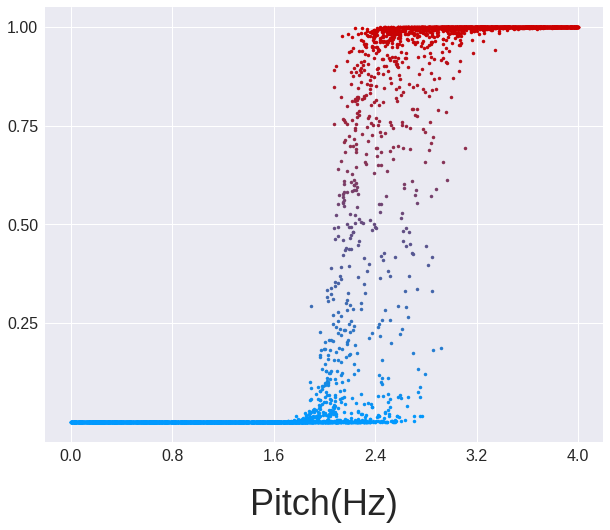

In [24]:
X_ticks = labelList[:, 2]

plt.figure(figsize=(10, 8))
for i in range(len(X_ticks)):
    normalC = np.asarray([0, 0.6, 1])
    faultC = np.asarray([0.8, 0, 0])
    dotC = Y_pred[i, 1] * faultC + (1 - Y_pred[i, 1]) * normalC
    plt.plot(X_ticks[i], Y_pred[i, 1], '.', color=dotC)


# plt.xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0], fontsize=16)
# plt.xlabel('Frequency(Hz)', fontsize=36, labelpad = 24)

plt.xticks([0, 0.8, 1.6, 2.4, 3.2, 4.0], fontsize=16)
plt.xlabel('Pitch(Hz)', fontsize=36, labelpad = 24)

plt.yticks([0.25, 0.5, 0.75, 1.0], fontsize=16)
# plt.ylabel('Fault Probability', fontsize=36, labelpad = 24)
# plt.gca().get_yaxis().set_visible(False)

# Need to match file name with x axis

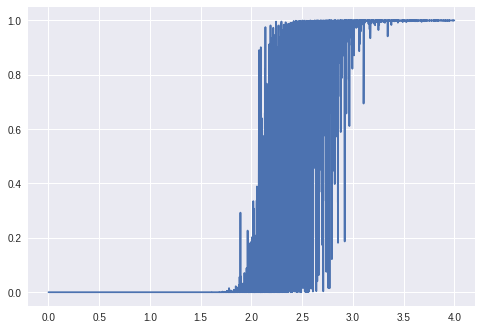

In [27]:
x = np.stack((X_ticks, Y_pred[:, 1])).T
y = np.asarray(sorted(x, key=lambda x: x[0]))
# plt.plot(x[:, 0], x[:, 1])
plt.plot(y[:, 0], y[:, 1])

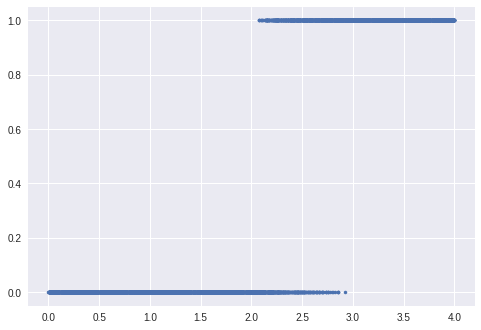

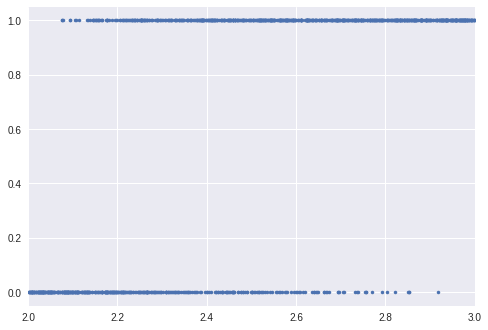

In [29]:
z = [round(val) for val in y[:, 1]]
pit = y[:, 0]
plt.plot(pit, z, '.')
plt.show()

plt.plot(pit, z, '.')
plt.xlim((2.0, 3.0))
plt.show()

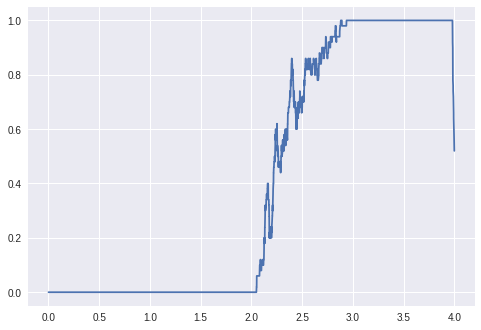

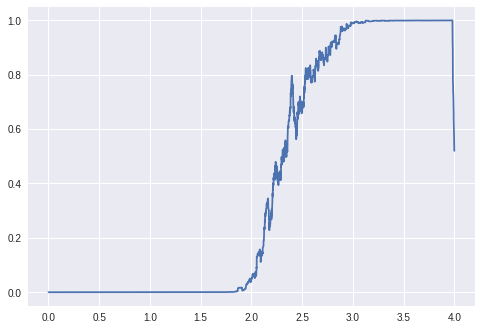

In [30]:
N = 50
zMovMean = np.convolve(z, np.ones((N,))/N, mode='same')
y2MovMean = np.convolve(y[:, 1], np.ones((N,))/N, mode='same')


plt.plot(pit, zMovMean)
plt.show()

plt.plot(pit, y2MovMean)
plt.show()

In [31]:
y[:, 1]
zMovMean

array([0.  , 0.  , 0.  , ..., 0.56, 0.54, 0.52])